<a href="https://colab.research.google.com/github/tobeono3/Bulletproof-/blob/main/BoxOffice_%26_Ratings_Explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Checking for missing values:
Title                0
Director             0
Year                 0
Rating               0
BoxOffice_Million    0
Genre                0
dtype: int64

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              10 non-null     object 
 1   Director           10 non-null     object 
 2   Year               10 non-null     int64  
 3   Rating             10 non-null     float64
 4   BoxOffice_Million  10 non-null     float64
 5   Genre              10 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 612.0+ bytes
None

Summary Statistics:
              Year     Rating  BoxOffice_Million
count    10.000000  10.000000          10.000000
mean   2008.000000   8.160000         403.804800
std       7.287737   0.609554         349.793767
min    1998.000000   7.200000     

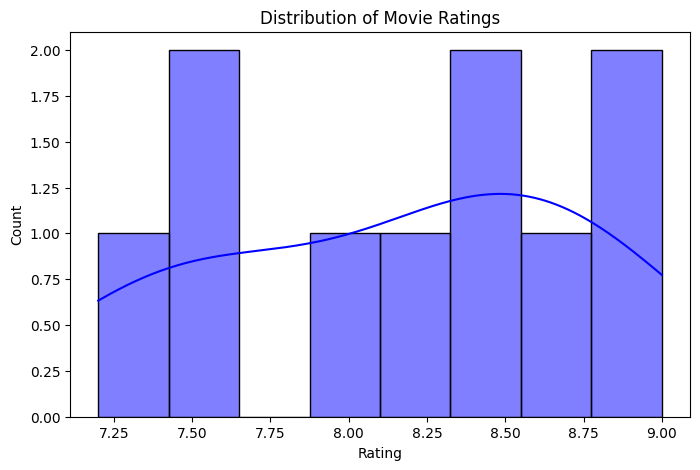

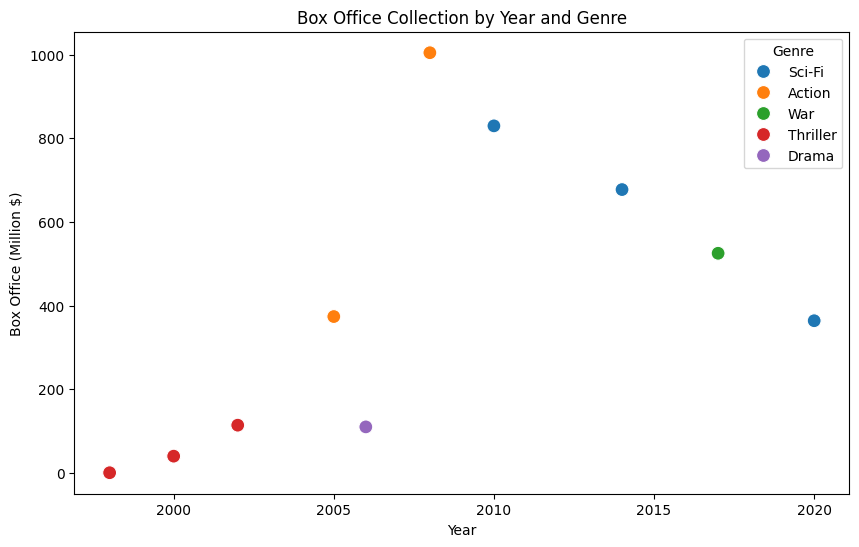

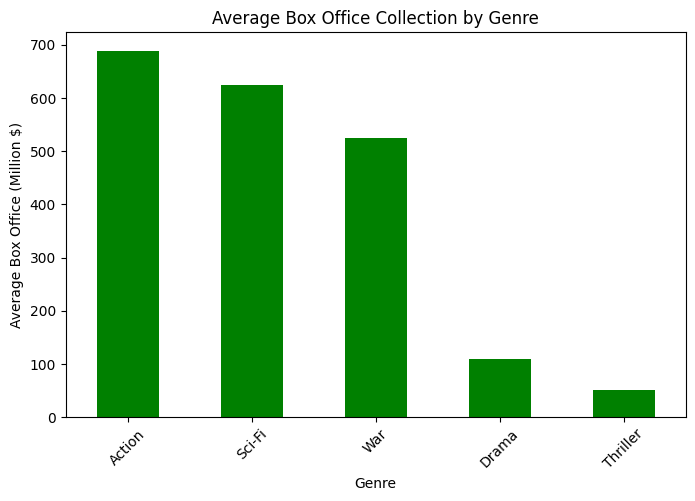

<ipython-input-3-1141b7f5f5c8>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Genre', palette='pastel')


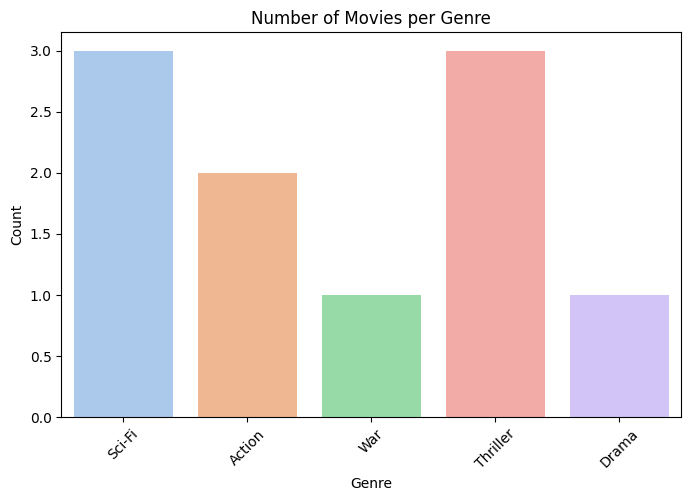

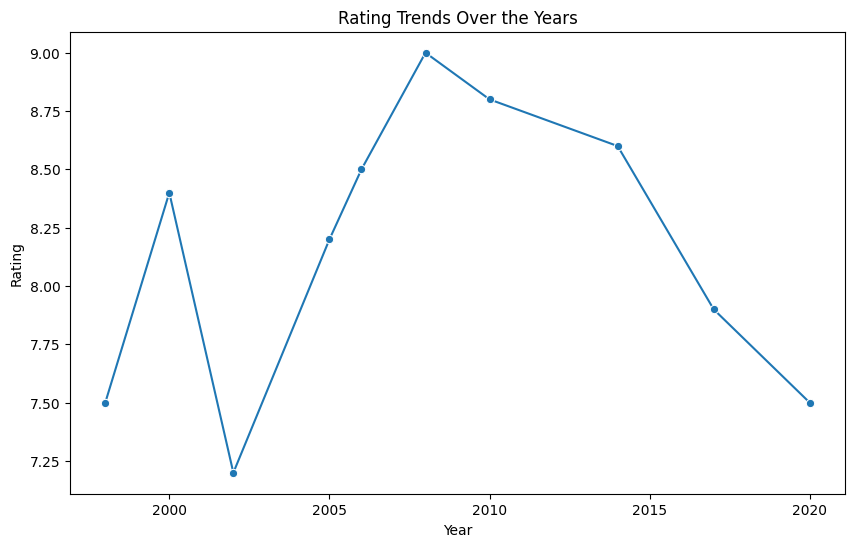

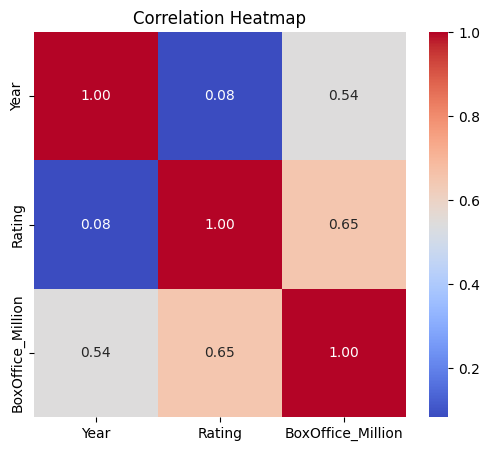

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
df = pd.read_csv('movies.csv')

# Data Cleaning
print("Checking for missing values:")
print(df.isnull().sum())

# If any missing values, fill with appropriate defaults or drop
# For this dataset, let's just drop rows with missing data (if any)
df = df.dropna()

# Convert Year to integer if not already
df['Year'] = df['Year'].astype(int)

# Basic info & stats
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Filter movies with rating > 8.0
high_rating = df[df['Rating'] > 8.0]
print("\nMovies with rating above 8.0:")
print(high_rating[['Title', 'Rating']])

# Average box office per genre
avg_box_office_genre = df.groupby('Genre')['BoxOffice_Million'].mean().sort_values(ascending=False)
print("\nAverage Box Office by Genre:")
print(avg_box_office_genre)

# Plot 1: Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=8, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot 2: Box Office vs Year scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='BoxOffice_Million', hue='Genre', s=100)
plt.title('Box Office Collection by Year and Genre')
plt.xlabel('Year')
plt.ylabel('Box Office (Million $)')
plt.legend(title='Genre')
plt.show()

# Plot 3: Average Box Office per Genre (bar plot)
plt.figure(figsize=(8, 5))
avg_box_office_genre.plot(kind='bar', color='green')
plt.title('Average Box Office Collection by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Box Office (Million $)')
plt.xticks(rotation=45)
plt.show()

# Plot 4: Number of Movies per Genre
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Genre', palette='pastel')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot 5: Rating Trends Over Years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Rating', marker='o')
plt.title('Rating Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

# Plot 6: Correlation heatmap
plt.figure(figsize=(6, 5))
corr = df[['Year', 'Rating', 'BoxOffice_Million']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

